In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sys

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
modelpath = "./MNIST_CNN.hdf5"
cp = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
esc = EarlyStopping(monitor='val_loss', patience=10)

In [16]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[esc, cp])


Epoch 1: val_loss did not improve from 0.03903

Epoch 2: val_loss did not improve from 0.03903

Epoch 3: val_loss did not improve from 0.03903

Epoch 4: val_loss did not improve from 0.03903

Epoch 5: val_loss did not improve from 0.03903

Epoch 6: val_loss did not improve from 0.03903

Epoch 7: val_loss did not improve from 0.03903

Epoch 8: val_loss did not improve from 0.03903

Epoch 9: val_loss did not improve from 0.03903

Epoch 10: val_loss did not improve from 0.03903

Epoch 11: val_loss did not improve from 0.03903

Epoch 12: val_loss did not improve from 0.03903

Epoch 13: val_loss did not improve from 0.03903

Epoch 14: val_loss did not improve from 0.03903

Epoch 15: val_loss did not improve from 0.03903

Epoch 16: val_loss did not improve from 0.03903

Epoch 17: val_loss did not improve from 0.03903


In [17]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 3s 9ms/step - loss: 0.0444 - accuracy: 0.9922

 Test Accuracy: 0.9922


In [18]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

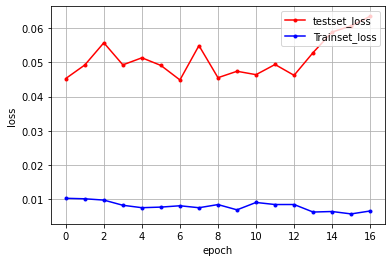

In [19]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c= "red", label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c= "blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()